In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import models as ms

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.metrics import mean_squared_error

from sklearn import set_config
from joblib import dump, load

In [4]:
# According to my findings from the model selection, the lasso() estimator had the lowest RSME with the basic parameters tuned. 
# I am going to try feature optimization and re train the model to create a more robust generalizable model

# from our lecture on feature engineering, we covered: 

# numerical data:
# Interactions between two elements by multiplying them, such as by using polynominal features
# correlation values
# pairplot for visualization of correlations

# categeorical data:

# These convert categeorical data to numerical representations
# pd.dummies
# onehotencoder

# KBestFeatures, sklearn

# Not in the material - but good to use, see source: https://machinelearningmastery.com/feature-selection-with-categorical-data/
# Chi Squared feature selection
# Mututal Information Feature Selection
# 



# Other
# look at k fold cross validation
# gridsearch, tune number of features as a hyperparameter

In [5]:
df_train_raw = pd.read_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-2-master/datasets/train.csv')

df = df_train_raw.copy()

In [6]:
df_test_raw = pd.read_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-2-master/datasets/test.csv')
df_test = df_test_raw.copy()

In [7]:
# This will use the entire dataset
#X = df.drop('SalePrice', axis=1)
#y = df['SalePrice']

In [8]:
# I'm going to do feature engineering and correlation decision

In [9]:
# first is to look at correlations in numeric columns

In [10]:
df_nums = df.loc[:, df.dtypes != object]

In [11]:
# using a histrogram we can easily look at the numerical data at a glance

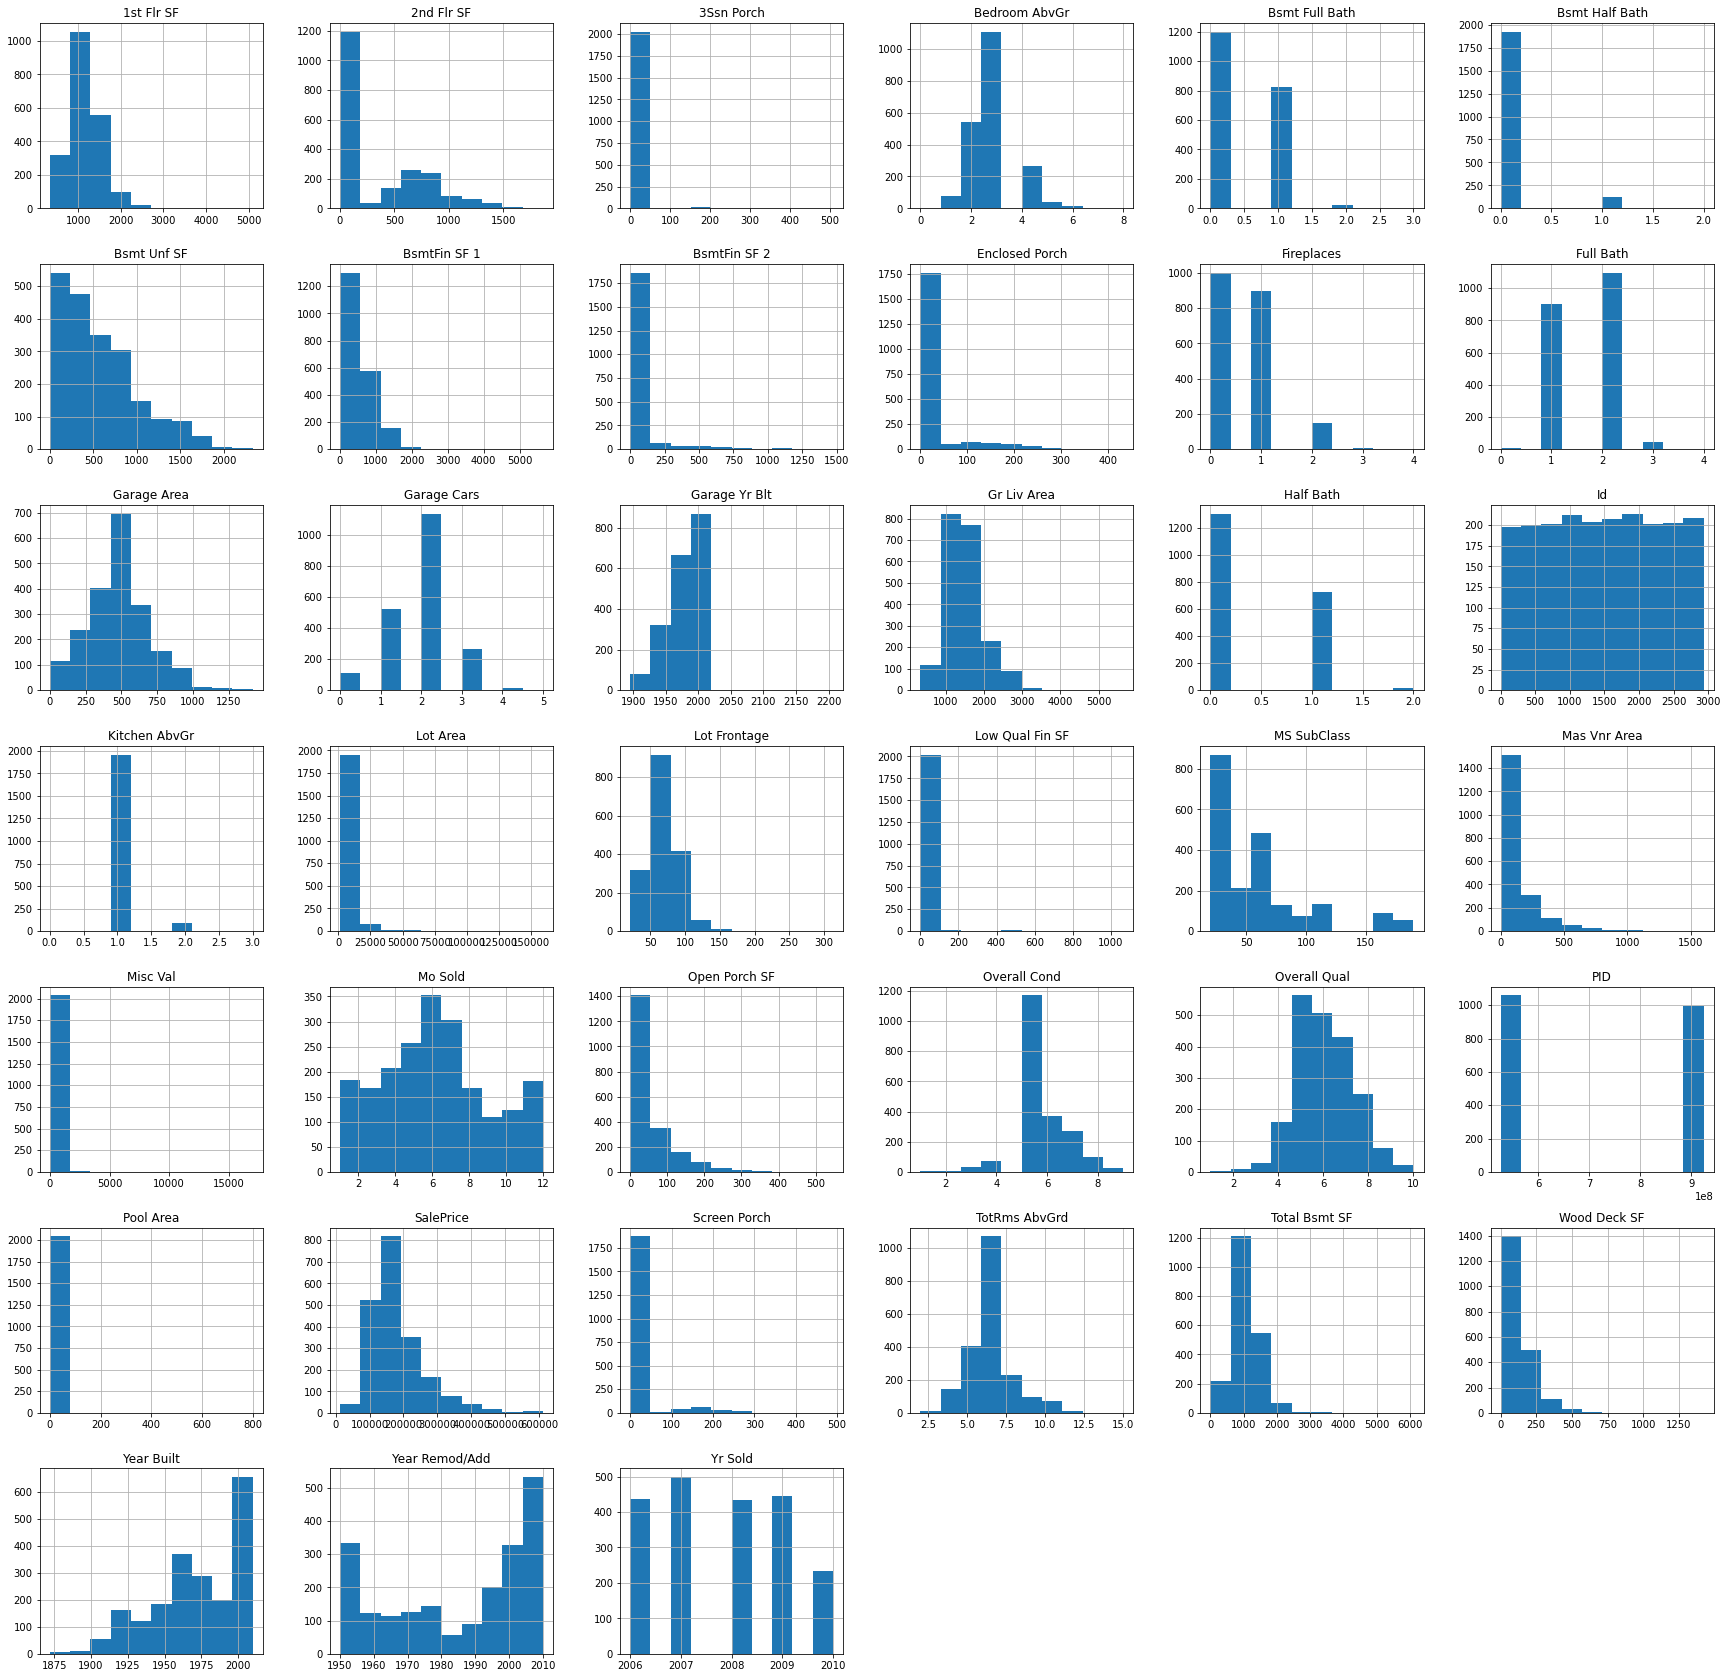

In [12]:
df.hist(figsize=(30,30));

In [13]:
# I want to see all numerical columns with a correlation above 0.50

In [14]:
corr_bool = df.loc[:, df.dtypes != object].corr()['SalePrice'] > 0.5

In [15]:
df_corr = df.loc[:, df.dtypes != object].loc[:, corr_bool]

In [16]:
# plotting this dataframe, I thinnk we were able to quickly remove any weird columns that were not normally distributed

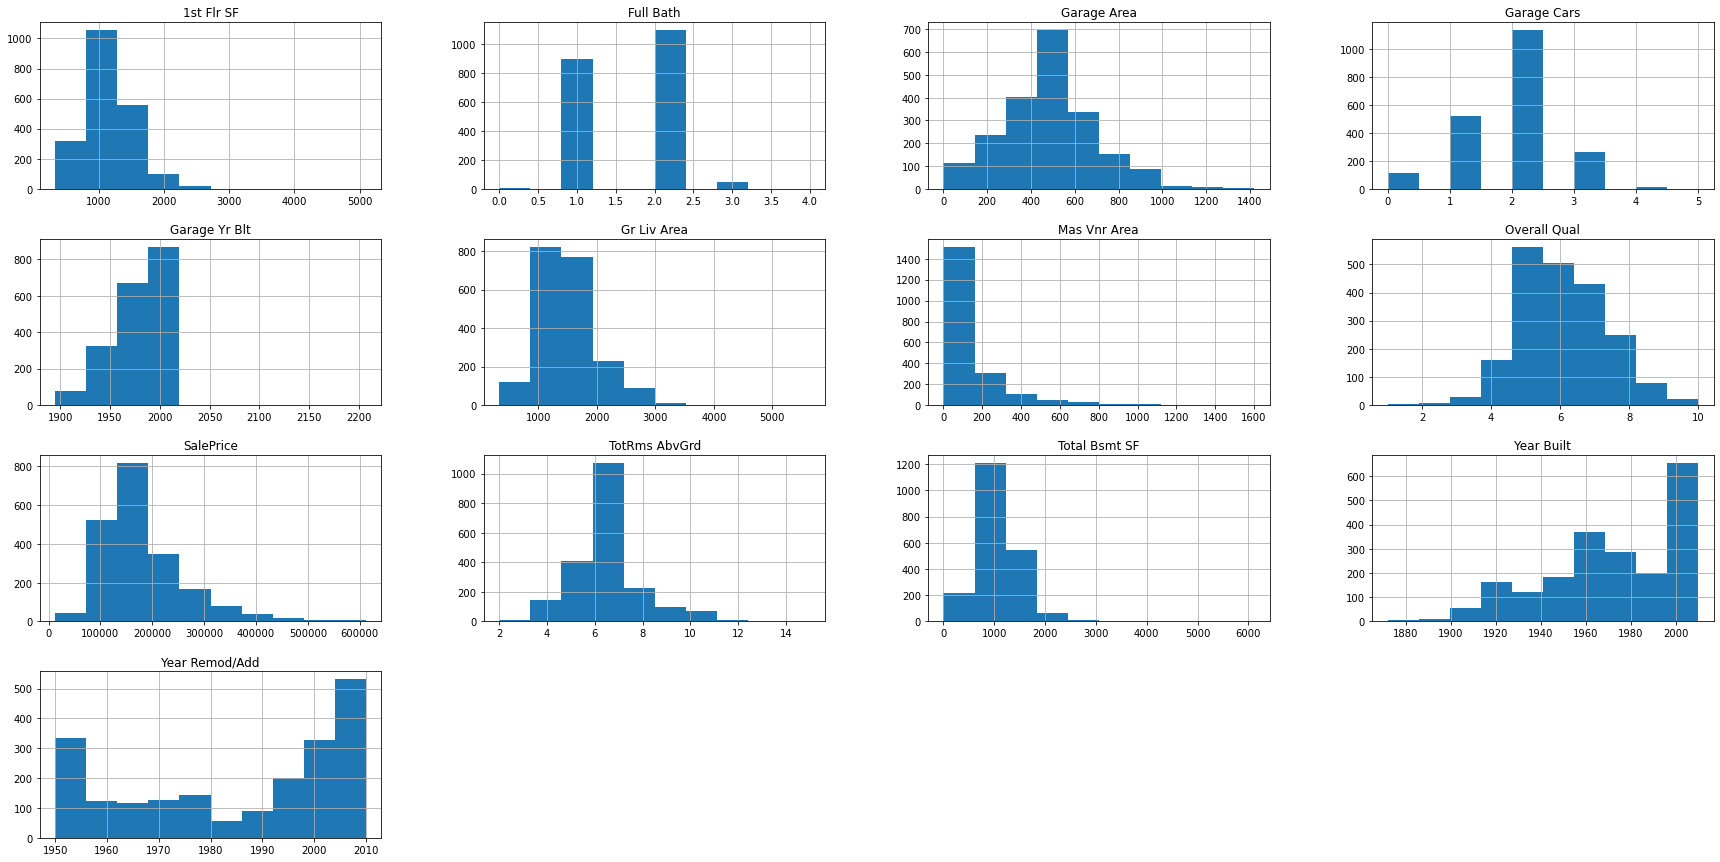

In [17]:
df_corr.hist(figsize=(30,15));

In [18]:
# looking at these numerical columns we can throw some out due to intuition
# Full bath looks useless
# Garage cars is inherently part of garage area, so we can drop that column too
# Gr year built is not going to be too helpful, and I think the year built will have a more important correlation
# MasVrn Area is heavily skewed to zero
# Overall Quality looks the most normally distributed

# Howver, looking at sale Price makes me wonder if I should include those numerical features skewed to the left, because SalePrice is skewed to the left.

# I think I should use the following numerical columns in my dataset because of their either normal distribution or 
# skewed distribution to the right to better predict the saleprice

# 1st floor SF, Garage Area, Overall Qual, TotRms AbvGrd, Total Bsmt, Year Built

In [19]:
# Let's look at the chosen columns when X at SalePrice and Y at those numerical features

In [20]:
df_corr.columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'TotRms AbvGrd', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'SalePrice'],
      dtype='object')

In [21]:
df_corr_sorted = df_corr[['1st Flr SF', 'Garage Area', 'Overall Qual', 'TotRms AbvGrd', 'Total Bsmt SF', 'Year Built', 'SalePrice']]

<ipython-input-22-b2a4c68a88b5>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 3, 1)
<ipython-input-22-b2a4c68a88b5>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 3, 2)
<ipython-input-22-b2a4c68a88b5>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

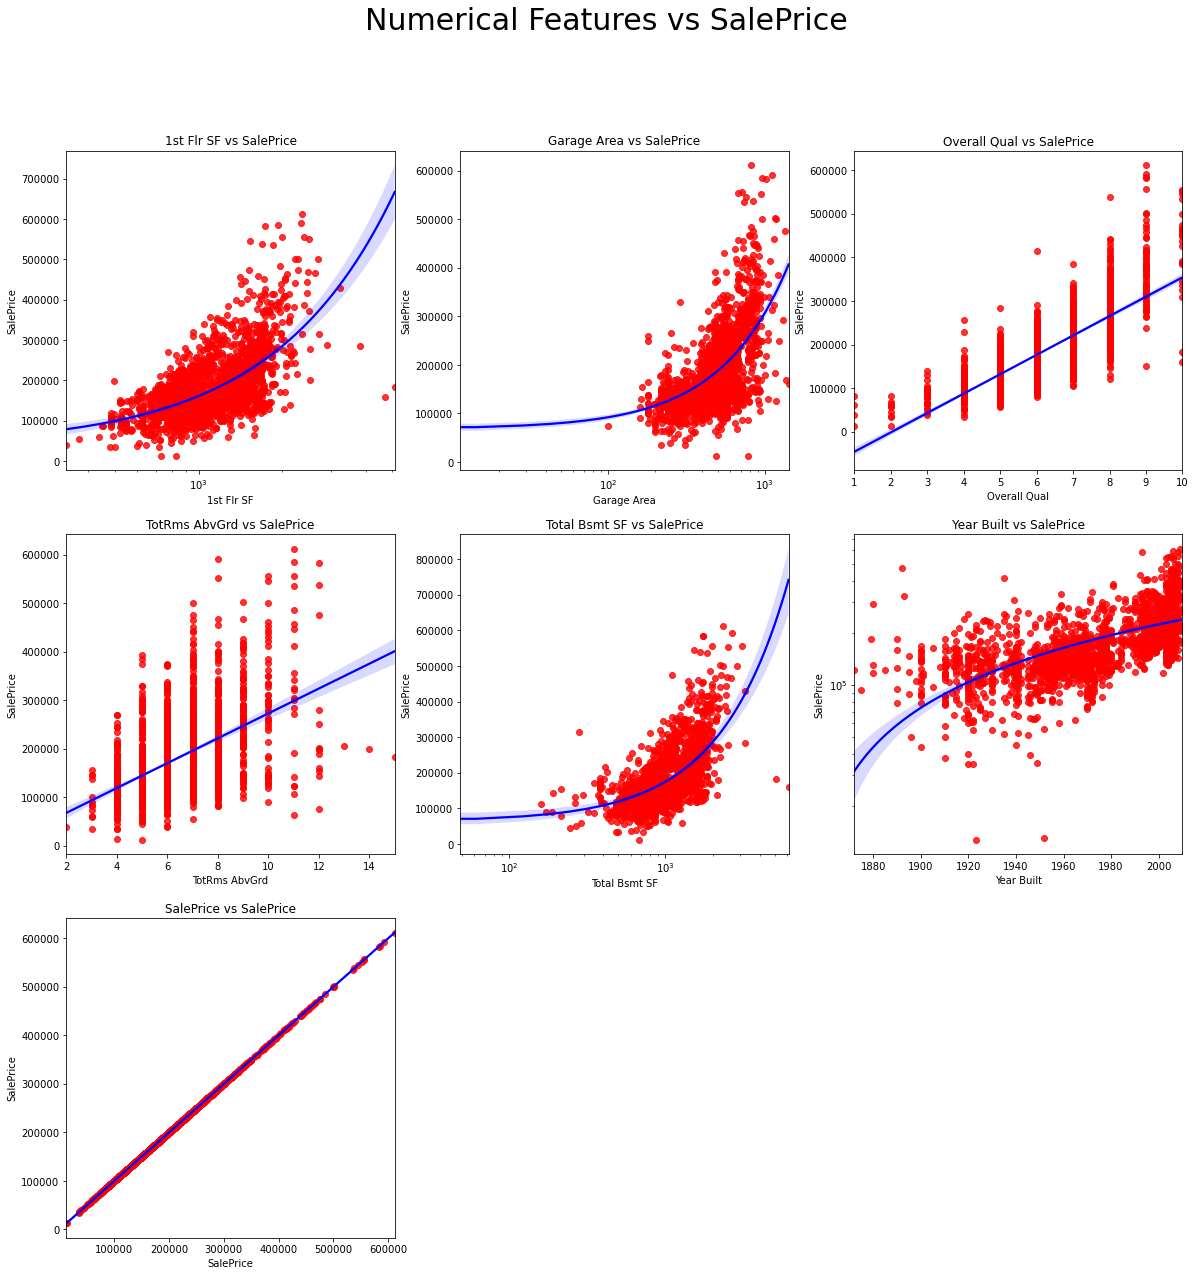

In [22]:
plt.figure(figsize=(20,20))
counter = 1
plt.suptitle('Numerical Features vs SalePrice', fontsize=30)
for i in df_corr_sorted:
    plt.subplot(3, 3, counter)
    # https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot/48146987
    sns.regplot(df_corr_sorted[i], df_corr_sorted['SalePrice'], line_kws={'color':'blue'}, scatter_kws={"color": "red"})
    plt.title(f'{i} vs SalePrice')
    plt.xlabel(f'{i}')
    plt.ylabel('SalePrice')
    counter += 1

plt.subplot(3, 3, 1)
plt.xscale('log')
plt.subplot(3, 3, 2)
plt.xscale('log')
plt.subplot(3,3, 5)
plt.xscale('log')
plt.subplot(3, 3, 6)
plt.yscale('log')

#plt.savefig('Numerical Features vs SalePrice')

In [23]:
# Not sure where to go from here, waiting for advice

# Spoke to Bibor, talked about KBest Features and doing Chi Tests

In [24]:
# looking at all object columns

In [25]:
df_objects = df.loc[:, df.dtypes == object]

In [26]:
# I'm outputting this sorted data into a csv so I can look at the categeorcial data and see what kinds of judgements i can make

In [27]:
#df_objects.to_csv('/home/blue/general-assembly/dsir-824/submissions/projects/project-2-master/manipulated-datasets/df_train_objects.csv')

In [28]:
# looking at this website, I am going to try finding anything important in the categoeries
# https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [ ]:
# Through reading I believe I should conduct an investigation into KBest Features for another approach
# for feature selection